#### Hi all.  🙋

#### We continue our **Beginner-Intermediate Friendly Machine Learning series**, which would help anyone who wants to learn or refresh the basics of ML.

#### What we have covered: 

#### [Beginner Friendly Detailed Explained EDAs – For anyone at the beginnings of DS/ML journey](https://www.kaggle.com/general/253911#1393015) ✔️

#### [BIAS & VARIANCE TRADEOFF](https://www.kaggle.com/kaanboke/ml-basics-bias-variance-tradeoff) ✔️

#### [LINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/ml-basics-linear-algorithms)  ✔️

#### [NONLINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/nonlinear-algorithms)  ✔️

#### [The Most Used Methods to Deal with MISSING VALUES](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)  ✔️

#### [Beginner Friendly End to End ML Project- Classification with Imbalanced Data](https://www.kaggle.com/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy)  ✔️

#### [How to Prevent the Data Leakage ?](https://www.kaggle.com/kaanboke/how-to-prevent-the-data-leakage) ✔️

#### [The Most Common EVALUATION METRICS- A Gentle Intro](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro) ✔️

#### [Feature Selection-The Most Common Methods to Know](https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know) ✔️

#### [Beginner Friendly End to End ML Project- Car Price Prediction](https://www.kaggle.com/kaanboke/car-price-prediction-beginner-friendly-94-3)  ✔️

#### In this notebook we will implement new beginner friendly end to end ML model by using **CATBOOST with Optuna HyperParameter Tuning**


#### Enjoy 🤘

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [What Problem We Have and Which Metric to Use?](#1)

* [Exploratory Data Analysis](#2)
    * [Target Variable](#3)
    * [Numerical Features](#4)
    * [Categorical Features](#5)    
    
* [Model Selection](#6)    
    * [Baseline Model](#7)
    * [Logistic & Linear Discriminant & SVC & KNN](#8)
    * [Logistic & Linear Discriminant & SVC & KNN with Scaler](#9)    
    * [Ensemble Models (AdaBoost & Gradient Boosting & Random Forest & Extra Trees)](#10)
    * [Famous Trio (XGBoost & LightGBM & Catboost)](#11)
    * [CATBOOST](#12)
    * [Catboost HyperParameter Tuning with OPTUNA](#13)
    * [Feature Importance](#14)    
    * [Model Comparison](#15)  
    
    


* [Conclusion](#16)

* [References & Further Reading](#17)

<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

# Heart Failure Prediction Dataset

DATA DICTONARY						
						
1	**Age**: 			Age of the patient [years] 		
2	**Sex**:  			 Sex of the patient [M: Male, F: Female] 		
3	**ChestPainType**: 			[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 		
4	**RestingBP**:			Resting blood pressure [mm Hg] 		
5	**Cholesterol**:			Serum cholesterol [mm/dl] 		
6	**FastingBS**:			 Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]		
7	**RestingECG**:			 Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 		
8	**MaxHR**:			Maximum heart rate achieved [Numeric value between 60 and 202]		
9	**ExerciseAngina**:			Exercise-induced angina [Y: Yes, N: No]		
10	**Oldpeak**:			 ST [Numeric value measured in depression] (		
11	**ST_Slope**:			 The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 		
12	**HeartDisease**:			 Output class [1: heart disease, 0: Normal] 		

Reference: https://www.kaggle.com/fedesoriano/heart-failure-prediction

<a id="1"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have and Which Metric to Use?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Based on the data and data dictionary, We have a classification problem.
- We wil make classification on the target variable **Heart Disease**
- And we will build a model to get best calssification possible on the target variable.
- For that we will look at the balance of the target variable.
- As we will see later, our target variable has balanced or balanced like data
- For that reason we will use **Accuracy score**.
- [For the detailed info about the evaluation metrics](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Let's import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- Overall data types seems ok.

In [4]:
df.duplicated().sum()

0

- No duplicates

In [5]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


- No missing values.

In [6]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [7]:
df[categorical].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

- So far so good. No zero variance and no extremely high variance.

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [8]:
y = df['HeartDisease']
print(f'Percentage of patient had a HeartDisease:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a HeartDisease: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} patient)')

Percentage of patient had a HeartDisease:  55.34 %  --> (508 patient)
Percentage of patient did not have a HeartDisease: 44.66  %  --> (410 patient)


- Almost 55% of the patients had a heart disease.
-  508 patient had a heart disease.
- Almost 45%  of patients didn't have a heart disease.
- 410 patient didn't have a heart disease.


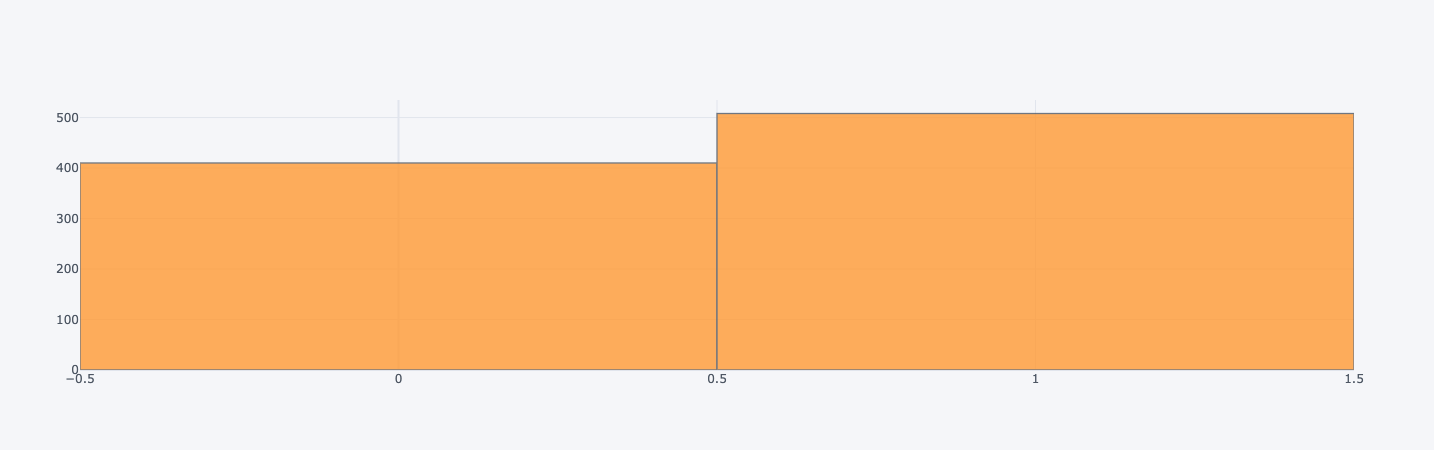

In [9]:
df['HeartDisease'].iplot(kind='hist')

- There is a little imblanace but nothing in the disturbing level.
- We can use 'accuracy' metric as our evaluation metric.

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Numerical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [10]:
df[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


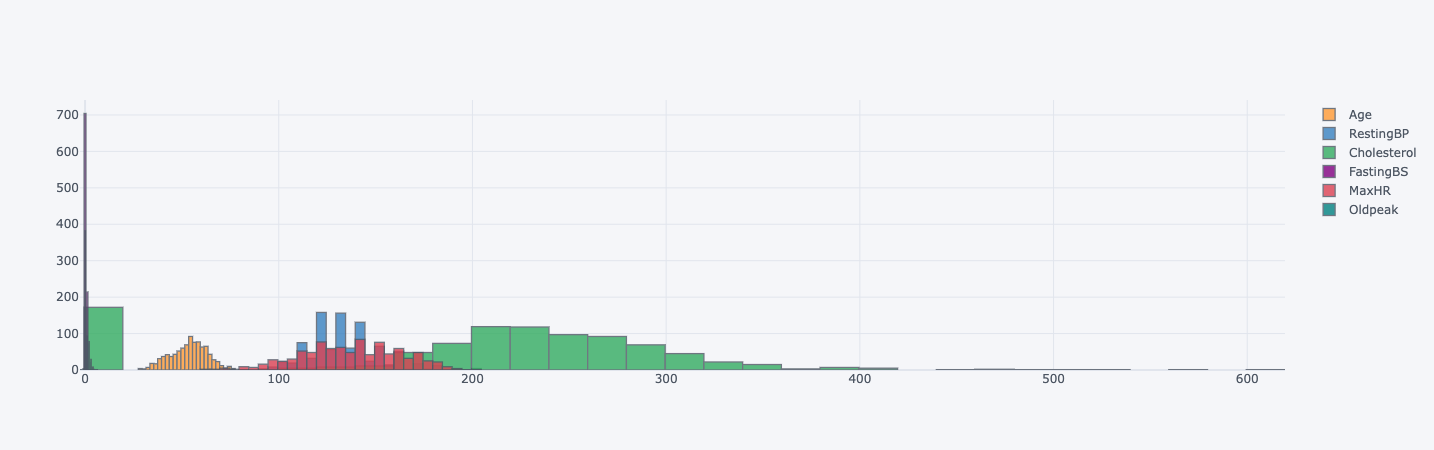

In [11]:
df[numerical].iplot(kind='hist');

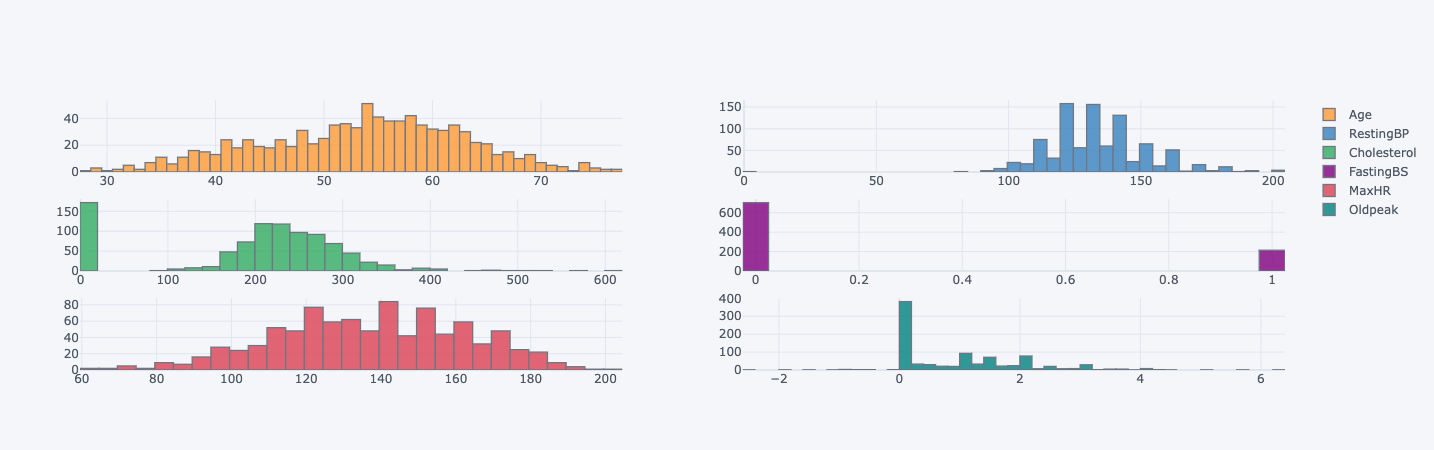

In [12]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [13]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].drop('FastingBS', axis=1).skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Oldpeak    1.022872
dtype: float64

- Nothing much for the skewness. Quite a normal like distribution for the numerical features.

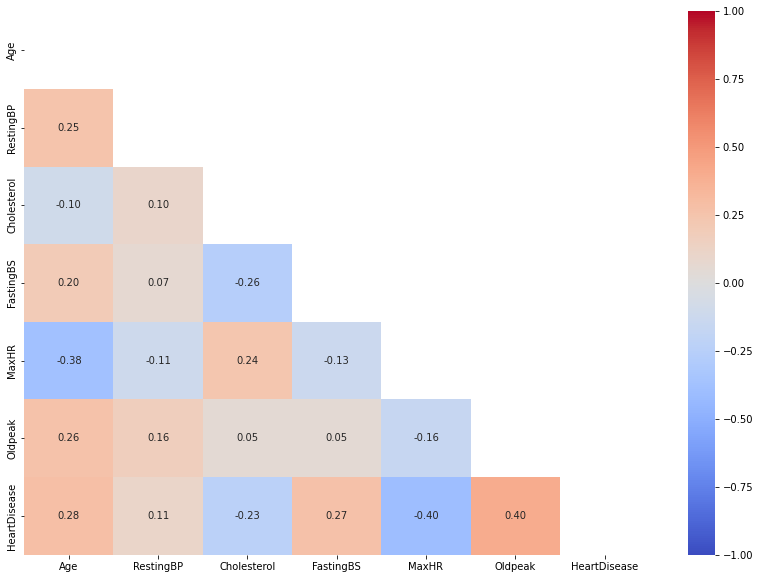

In [14]:
numerical1= df.select_dtypes('number').columns


matrix = np.triu(df[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

- Based on the  matrix, we can observe weak level correlation between the numerical features and the target variable
- Oldpeak (depression related number) has a positive correlation with the heart disease.
- Maximum heart rate has negative correlation with the heart disease.
- interestingly cholesterol has negative correlation with the heart disease.


<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Categorical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [15]:
df[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


### **Gender and Heart Disease**

In [16]:
print (f'A female person has a probability of {round(df[df["Sex"]=="F"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')

print()

print (f'A male person has a probability of {round(df[df["Sex"]=="M"]["HeartDisease"].mean()*100,2)} % have a HeartDisease')

print()


A female person has a probability of 25.91 % have a HeartDisease

A male person has a probability of 63.17 % have a HeartDisease



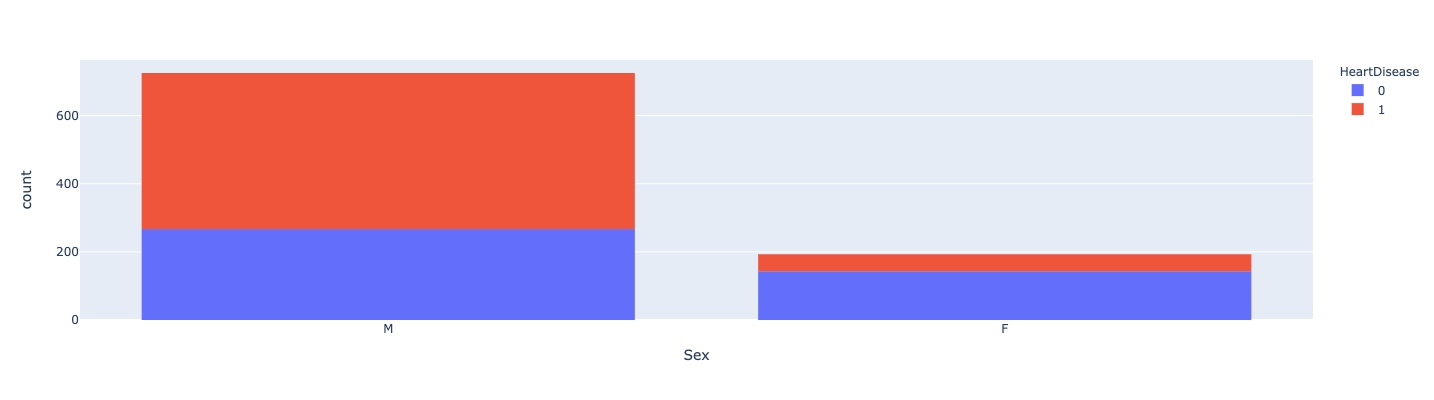

In [17]:
fig = px.histogram(df, x="Sex", color="HeartDisease",width=400, height=400)
fig.show()

- Bad news guys....
- Men are almost 2.44 times more likely have a heart disease than women.

![](https://media.giphy.com/media/MuAz5ozYsaC7rkRUe2/giphy-downsized-large.gif)

gif credit: https://giphy.com

### **Chest Pain Type and Heart Disease**

In [18]:
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)

ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64

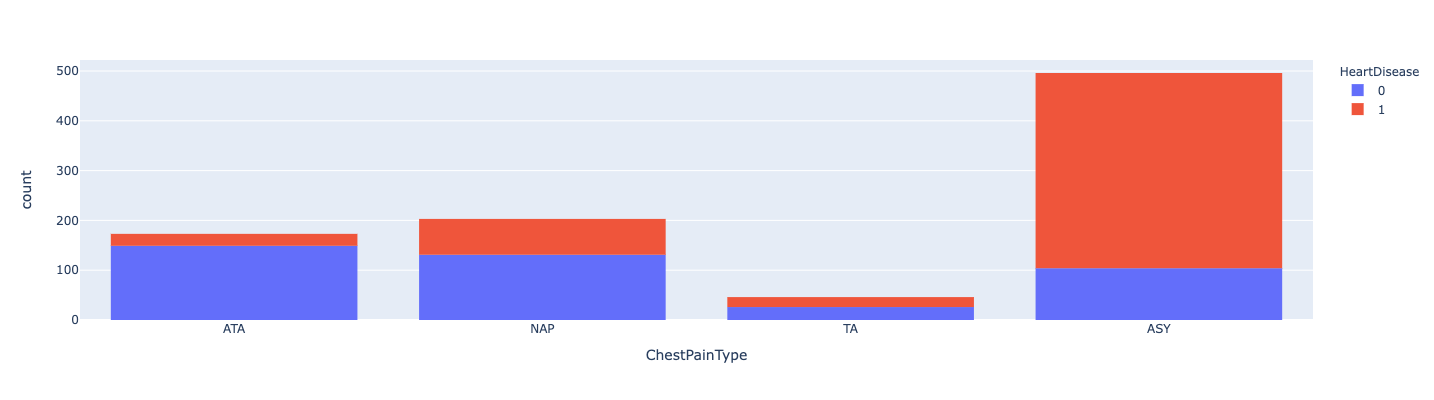

In [19]:
fig = px.histogram(df, x="ChestPainType", color="HeartDisease",width=400, height=400)
fig.show()

- We can observe clear differences among the chest pain type.
- Person with ASY: Asymptomatic chest pain  has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain.


### **RestingECG and Heart Disease**

In [20]:
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)

RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64

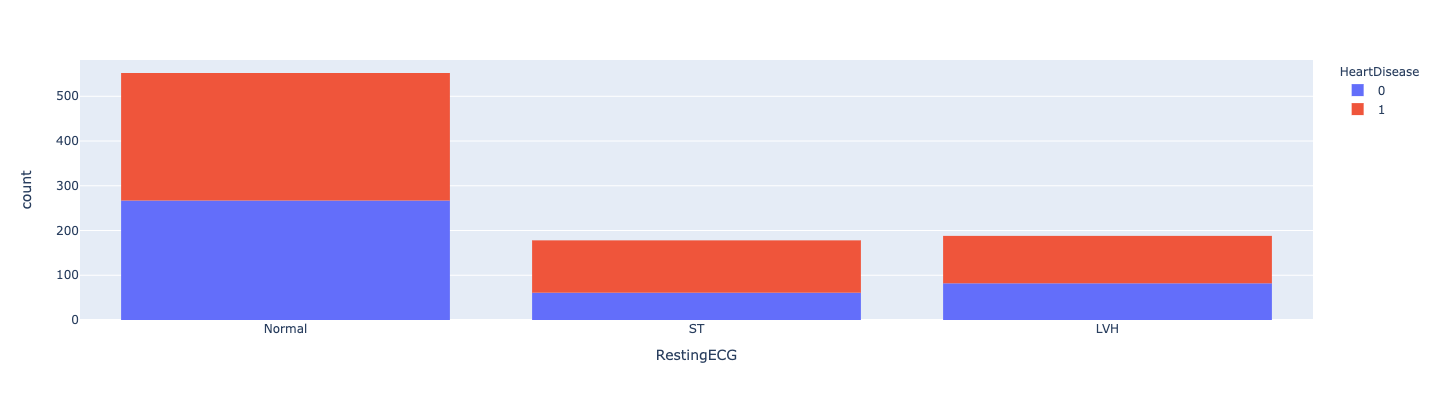

In [21]:
fig = px.histogram(df, x="RestingECG", color="HeartDisease",width=400, height=400)
fig.show()

- RestingECG: resting electrocardiogram results don't differ much.
- Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.

### **ExerciseAngina and Heart Disease**

In [22]:
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)

ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64

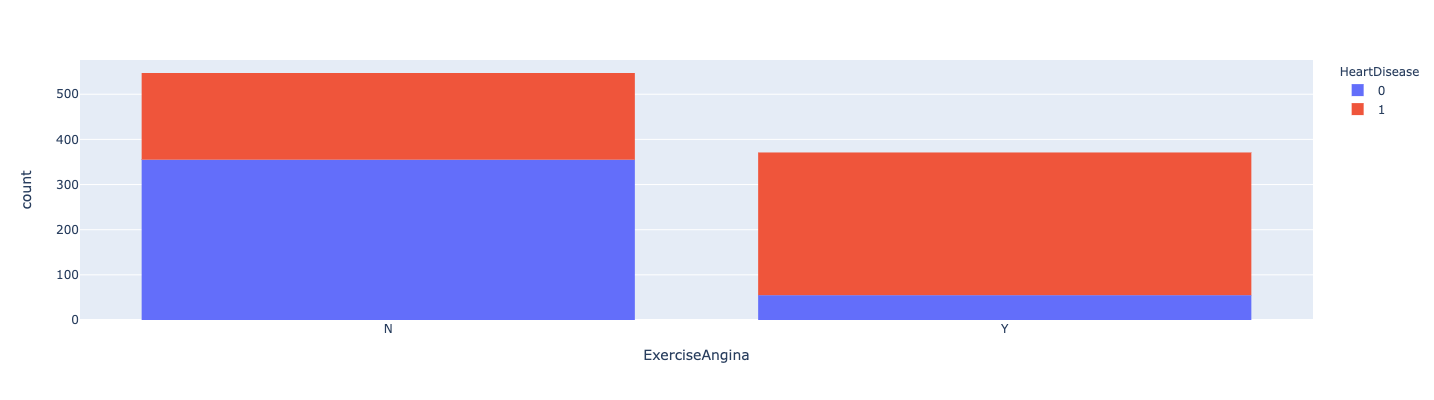

In [23]:
fig = px.histogram(df, x="ExerciseAngina", color="HeartDisease",width=400, height=400)
fig.show()

- ExerciseAngina: exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No'

### **ST_Slope and Heart Disease**

In [24]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)

ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64

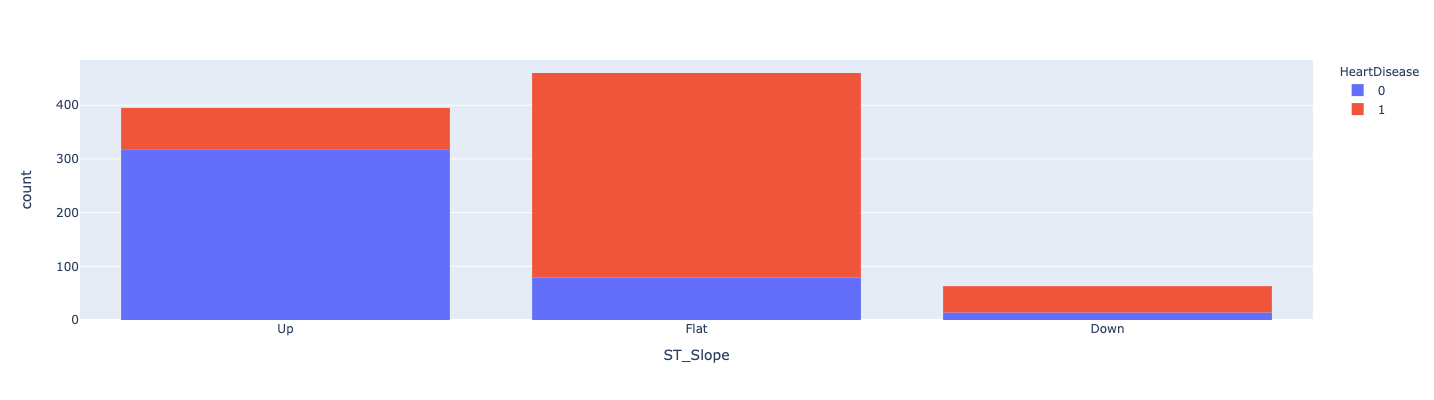

In [25]:
fig = px.histogram(df, x="ST_Slope", color="HeartDisease",width=400, height=400)
fig.show()

- ST_Slope: the slope of the peak exercise ST segment has differences.
-  ST_Slope Up significantly less likely has heart disease than the other two segment.

### Overall Insights from the Exploratory Data Analysis

- Target variable has close to balanced data.
- Numerical features have weak correlation with the target variable.
- Oldpeak (depression related number) has a positive correlation with the heart disease.
- Maximum heart rate has negative correlation with the heart disease.
- Interestingly cholesterol has negative correlation with the heart disease.
- Based on the gender; Men are almost 2.44 times more likely have a heart disease than women.
- We can observe clear differences among the chest pain type.
- Person with ASY: Asymptomatic chest pain  has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain.
- RestingECG: resting electrocardiogram results don't differ much.
- Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.
- ExerciseAngina: exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No'
- ST_Slope: the slope of the peak exercise ST segment has differences.
- ST_Slope Up significantly less likely has heart disease than the other two segment.




<a id="6"></a>
<font color="lightseagreen" size=+2.5><b>MODEL SELECTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- We'll use dummy classifier model as a base model
-  And then we will use Logistic & Linear Discriminant & KNeighbors and Support Vector Machine models with and without scaler.
- And then we will use ensemble models, Adaboost, Randomforest, Gradient Boosting and Extra Trees
- We will see famous trio: XGBoost,LightGBM & Catboost
- Finally we will look in detail to hyperparameter tuning for Catboost
- Let's start.

<a id="7"></a>
<font color="lightseagreen" size=+1.5><b>Baseline Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [26]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  


model = DummyClassifier(strategy='constant', constant=1)
pipe = make_pipeline(ct, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant') and  accuracy score is : 0.5942


,Accuracy
DummyClassifier,0.5942


<a id="8"></a>
<font color="lightseagreen" size=+1.5><b>Logistic & Linear Discriminant & SVC & KNN</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [27]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8841
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.7246
model : KNeighborsClassifier() and  accuracy score is : 0.7174


,Accuracy
Logistic,0.8841
LinearDiscriminant,0.8696
SVM,0.7246
KNeighbors,0.7174


<a id="9"></a>
<font color="lightseagreen" size=+1.5><b> Logistic & Linear Discriminant & SVC & KNN with Scaler</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [28]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
s= StandardScaler()
ct1= make_column_transformer((ohe,categorical),(s,numerical))  


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models: 
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl','KNeighbors_scl']
result_df2 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df2

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8804
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.8841
model : KNeighborsClassifier() and  accuracy score is : 0.8841


,Accuracy
Logistic_scl,0.8804
LinearDiscriminant_scl,0.8696
SVM_scl,0.8841
KNeighbors_scl,0.8841


- As expected, with scaler, both KNN and SVM did a better job with the scaler than their previous performances.

- Let's see how ensemble models do with the problem at hand.

<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Ensemble Models (AdaBoost & Gradient Boosting & Random Forest & Extra Trees)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [29]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  

ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)



models = [ada,gb,rf,et]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Ada','Gradient','Random','ExtraTree']
result_df3 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df3

model : AdaBoostClassifier(random_state=0) and  accuracy score is : 0.8659
model : GradientBoostingClassifier(random_state=0) and  accuracy score is : 0.8768
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.8877
model : ExtraTreesClassifier(random_state=0) and  accuracy score is : 0.8804


,Accuracy
Ada,0.8659
Gradient,0.8768
Random,0.8877
ExtraTree,0.8804


- Accuracy scores are very close to each other.
- Both Random Forest and Extra tree got similar accuracy scores.
- Both model can be improved by hyperparameter tuning.

- OK. Let's see the very famous trio:
  - XGBoost
  - Light GBM
  - Catboost

<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Famous Trio (XGBoost & LightGBM & Catboost)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- I'll use Catboost alone by using its capability to handle categorical variables without doing any preprocessing.
- Let's first look at the XGBoost and LightGBM

In [30]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  

xgbc = XGBClassifier(random_state=0)
lgbmc=LGBMClassifier(random_state=0)


models = [xgbc,lgbmc]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['XGBoost','LightGBM']
result_df4 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df4

[19:00:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy
XGBoost,0.8297
LightGBM,0.8732


- With their deafult values, Catboost did better job than the other two models.

- Now let's see Catboost

![](https://avatars.mds.yandex.net/get-bunker/56833/dba868860690e7fe8b68223bb3b749ed8a36fbce/orig)

image credit: https://avatars.mds.yandex.net

<a id="12"></a>
<font color="lightseagreen" size=+1.5><b> CATBOOST</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

**Purpose**: 
   
   Training and applying models for the classification problems. Provides compatibility with the scikit-learn tools.

**The default optimized objective depends on various conditions**:

**Logloss** — The target has only two different values or the target_border parameter is not None.

**MultiClass** — The target has more than two different values and the border_count parameter is None.

Reference: https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier


In [31]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0)

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df5



,Accuracy
Catboost_default,0.8804


- Let's make some adjustment on the Catboost model to see its' peak performance on the problem.

<a id="13"></a>
<font color="lightseagreen" size=+1.5><b>Catboost HyperParameter Tuning with Optuna</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [52]:
def objective(trial):
    X= df.drop('HeartDisease', axis=1)
    y= df['HeartDisease']
    categorical_features_indices = np.where(X.dtypes != np.float)[0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-10-02 19:12:27,447] A new study created in memory with name: no-name-8a85af81-fb67-4ad4-8c1d-db929eb1a88e
[I 2021-10-02 19:12:28,033] Trial 0 finished with value: 0.8731884057971014 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.02062214221352644, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.1851210741447478}. Best is trial 0 with value: 0.8731884057971014.
[I 2021-10-02 19:12:28,896] Trial 1 finished with value: 0.8913043478260869 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.013983406066328996, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.5774351887788851}. Best is trial 1 with value: 0.8913043478260869.
[I 2021-10-02 19:12:34,377] Trial 2 finished with value: 0.8876811594202898 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09765831645072198, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsamp

Number of finished trials: 50
Best trial:
  Value: 0.9021739130434783
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.07461412258635804
    depth: 12
    boosting_type: Plain
    bootstrap_type: MVS


**Parameters**:

- **Objective**:  Supported metrics for overfitting detection and best model selection 

- **colsample_bylevel**: this parameter speeds up the training and usually does not affect the quality.

- **depht** : Depth of the tree.


- **boosting_type** : By default, the boosting type is set to for small datasets. This prevents overfitting but it is expensive in terms of computation. Try to set the value of this parameter to  to speed up the training.

- **bootstrap_type** : By default, the method for sampling the weights of objects is set to . The training is performed faster if the method is set and the value for the sample rate for bagging is smaller than 1.


Reference: https://catboost.ai/




- Ok let's use our best model with new parameters.

In [41]:
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0,
                          objective= 'CrossEntropy',
    colsample_bylevel= 0.04292240490294766,
    depth= 10,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df6



              precision    recall  f1-score   support

           0       0.88      0.90      0.89       112
           1       0.93      0.91      0.92       164

    accuracy                           0.91       276
   macro avg       0.90      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276



,Accuracy
Catboost_tuned,0.9094


- We have lift from 0.8804 to .9094

<a id="14"></a>
<font color="lightseagreen" size=+1.5><b>Feature Importance</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

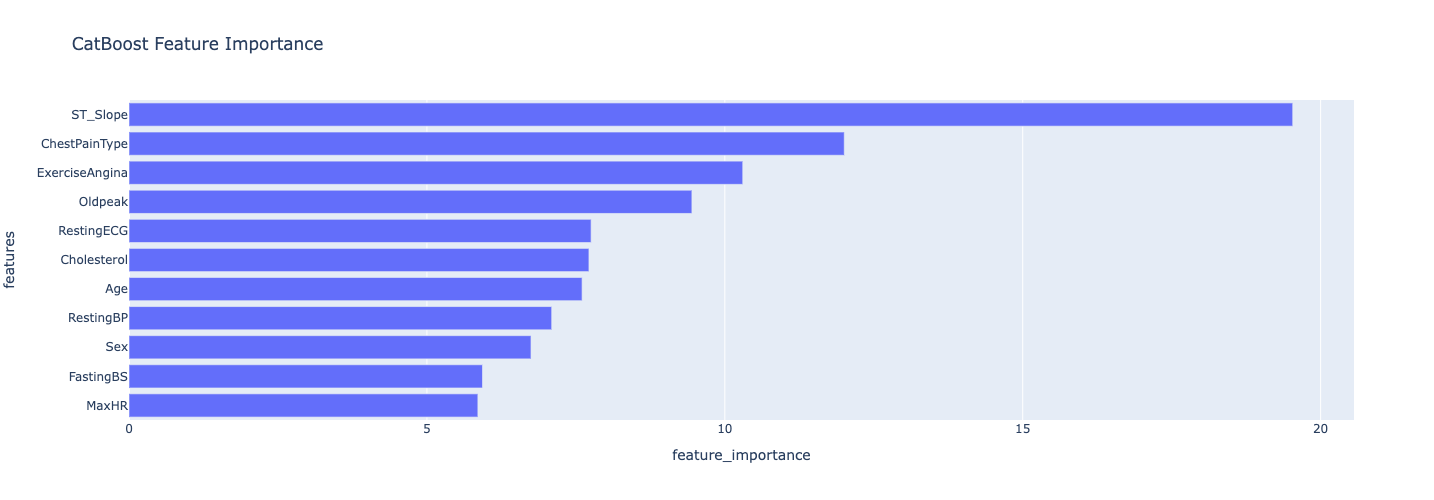

In [34]:
feature_importance = np.array(model.get_feature_importance())
features = np.array(X_train.columns)
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=True,inplace=True)
fig = px.bar(df_fi, x='feature_importance', y='features',title="CatBoost Feature Importance",height=500)
fig.show()

<a id="15"></a>
<font color="lightseagreen" size=+1.5><b>Model Comparison</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [35]:
result_final = pd.concat([dummy_result_df,result_df1,result_df2,result_df3,result_df4,result_df5,result_df6],axis=0)

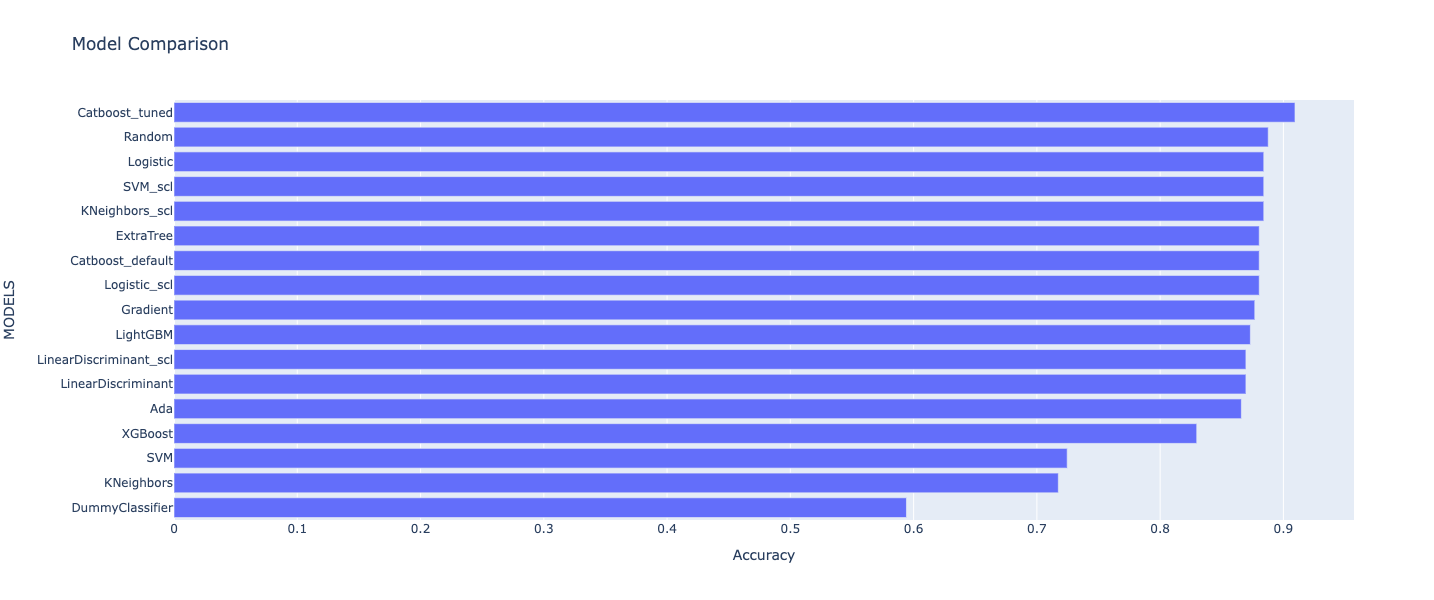

In [36]:
result_final.sort_values(by=['Accuracy'], ascending=True,inplace=True)
fig = px.bar(result_final, x='Accuracy', y=result_final.index,title='Model Comparison',height=600,labels={'index':'MODELS'})
fig.show()

<a id="16"></a>
<font color="darkblue" size=+1.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


- We have developed model to classifiy heart disease cases.

- First, we  made the detailed exploratory analysis.
- We have decided which metric to use.
- We analyzed both target and features in detail.
- We transform categorical variables into numeric so we can use them in the model.
- We use pipeline to avoid data leakage.
- We looked at the results of the each model and selected the best one for the problem on hand.
- We looked in detail Catboost
- We made hyperparameter tuning of the Catboost with Optuna to see the improvement
- We looked at the feature importance.



- After this point it is up to you to develop and improve the models.  **Enjoy** 🤘

#### By the way, when you like the topic, you can show it by supporting 👍

####  **Feel free to leave a comment**. 

#### All the best 🤘

![](https://media.giphy.com/media/3o7TKUM3IgJBX2as9O/giphy.gif)

gif credit: https://media.giphy.com/

<a id="17"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)